# Taller de Python - Redes y Algoritmo de Dijkstra

## Objetivo
Crear una red de 100 nodos con posiciones aleatorias en un área de 100m x 100m, con radio de comunicación de 14m, y encontrar la ruta de mínimo costo entre un nodo fuente y destino aleatorios usando el algoritmo de Dijkstra.

**Autor:** David Alberto Cuadros Mariño 
**Fecha:** Febrero 2026  
**Curso:** Fundamentos de Aprendizaje Automático

## 1. Importar librerías necesarias

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial.distance import euclidean
import random

# Configuración de estilo para las gráficas
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 10)

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Parámetros de la red

In [6]:
# Parámetros del problema
NUM_NODOS = 100
AREA_SIZE = 100  # metros
RADIO_COMUNICACION = 14  # metros

# Semilla aleatoria para reproducibilidad (opcional, puedes comentar esta línea)
np.random.seed(42)
random.seed(42)

print(f"Configuración de la red:")
print(f"  - Número de nodos: {NUM_NODOS}")
print(f"  - Área: {AREA_SIZE}m x {AREA_SIZE}m")
print(f"  - Radio de comunicación: {RADIO_COMUNICACION}m")

Configuración de la red:
  - Número de nodos: 100
  - Área: 100m x 100m
  - Radio de comunicación: 14m


## 3. Generar posiciones aleatorias de los nodos

In [7]:
# Generar posiciones aleatorias para los nodos
posiciones = {}
for i in range(NUM_NODOS):
    x = np.random.uniform(0, AREA_SIZE)
    y = np.random.uniform(0, AREA_SIZE)
    posiciones[i] = (x, y)

print(f"Se generaron {len(posiciones)} nodos con posiciones aleatorias")
print(f"Primeros 5 nodos:")
for i in range(5):
    print(f"  Nodo {i}: ({posiciones[i][0]:.2f}, {posiciones[i][1]:.2f})")

Se generaron 100 nodos con posiciones aleatorias
Primeros 5 nodos:
  Nodo 0: (37.45, 95.07)
  Nodo 1: (73.20, 59.87)
  Nodo 2: (15.60, 15.60)
  Nodo 3: (5.81, 86.62)
  Nodo 4: (60.11, 70.81)


## 4. Crear el grafo de la red

In [8]:
# Crear un grafo no dirigido
G = nx.Graph()

# Agregar todos los nodos al grafo
G.add_nodes_from(range(NUM_NODOS))

# Crear enlaces entre nodos que estén dentro del radio de comunicación
num_enlaces = 0
for i in range(NUM_NODOS):
    for j in range(i + 1, NUM_NODOS):
        # Calcular la distancia euclidiana entre los nodos i y j
        distancia = euclidean(posiciones[i], posiciones[j])
        
        # Si la distancia es menor o igual al radio de comunicación, crear enlace
        if distancia <= RADIO_COMUNICACION:
            G.add_edge(i, j, weight=distancia)
            num_enlaces += 1

print(f"Grafo creado:")
print(f"  - Nodos: {G.number_of_nodes()}")
print(f"  - Enlaces: {G.number_of_edges()}")
print(f"  - Densidad: {nx.density(G):.4f}")

Grafo creado:
  - Nodos: 100
  - Enlaces: 272
  - Densidad: 0.0549


## 5. Seleccionar nodos fuente y destino aleatorios

In [9]:
# Seleccionar nodo fuente y destino aleatorios (garantizando que sean diferentes)
nodo_fuente = random.randint(0, NUM_NODOS - 1)
nodo_destino = random.randint(0, NUM_NODOS - 1)

# Asegurar que el nodo destino sea diferente del nodo fuente
while nodo_destino == nodo_fuente:
    nodo_destino = random.randint(0, NUM_NODOS - 1)

print(f"Nodo fuente: {nodo_fuente}")
print(f"Nodo destino: {nodo_destino}")
print(f"Posición fuente: ({posiciones[nodo_fuente][0]:.2f}, {posiciones[nodo_fuente][1]:.2f})")
print(f"Posición destino: ({posiciones[nodo_destino][0]:.2f}, {posiciones[nodo_destino][1]:.2f})")

Nodo fuente: 81
Nodo destino: 14
Posición fuente: (63.35, 53.58)
Posición destino: (59.24, 4.65)


## 6. Aplicar el algoritmo de Dijkstra

In [10]:
# Intentar encontrar la ruta de mínimo costo usando Dijkstra
try:
    # NetworkX implementa el algoritmo de Dijkstra
    ruta = nx.shortest_path(G, source=nodo_fuente, target=nodo_destino, weight='weight')
    costo_total = nx.shortest_path_length(G, source=nodo_fuente, target=nodo_destino, weight='weight')
    
    print(f"\n¡Ruta encontrada!")
    print(f"Ruta de mínimo costo: {ruta}")
    print(f"Número de saltos: {len(ruta) - 1}")
    print(f"Costo total: {costo_total:.2f} metros")
    
    # Calcular el costo de cada segmento
    print(f"\nDesglose de la ruta:")
    for i in range(len(ruta) - 1):
        nodo_actual = ruta[i]
        nodo_siguiente = ruta[i + 1]
        peso = G[nodo_actual][nodo_siguiente]['weight']
        print(f"  Nodo {nodo_actual} → Nodo {nodo_siguiente}: {peso:.2f}m")
    
    ruta_existe = True
    
except nx.NetworkXNoPath:
    print(f"\n⚠️ No existe una ruta entre el nodo {nodo_fuente} y el nodo {nodo_destino}")
    print(f"Los nodos están en componentes desconectadas de la red.")
    ruta = []
    costo_total = 0
    ruta_existe = False


¡Ruta encontrada!
Ruta de mínimo costo: [81, 73, 48, 71, 94, 10, 14]
Número de saltos: 6
Costo total: 57.86 metros

Desglose de la ruta:
  Nodo 81 → Nodo 73: 4.09m
  Nodo 73 → Nodo 48: 11.48m
  Nodo 48 → Nodo 71: 12.92m
  Nodo 71 → Nodo 94: 6.73m
  Nodo 94 → Nodo 10: 13.13m
  Nodo 10 → Nodo 14: 9.51m


## 7. Visualización de la red y la ruta


Gráfica guardada como 'red_dijkstra.png'


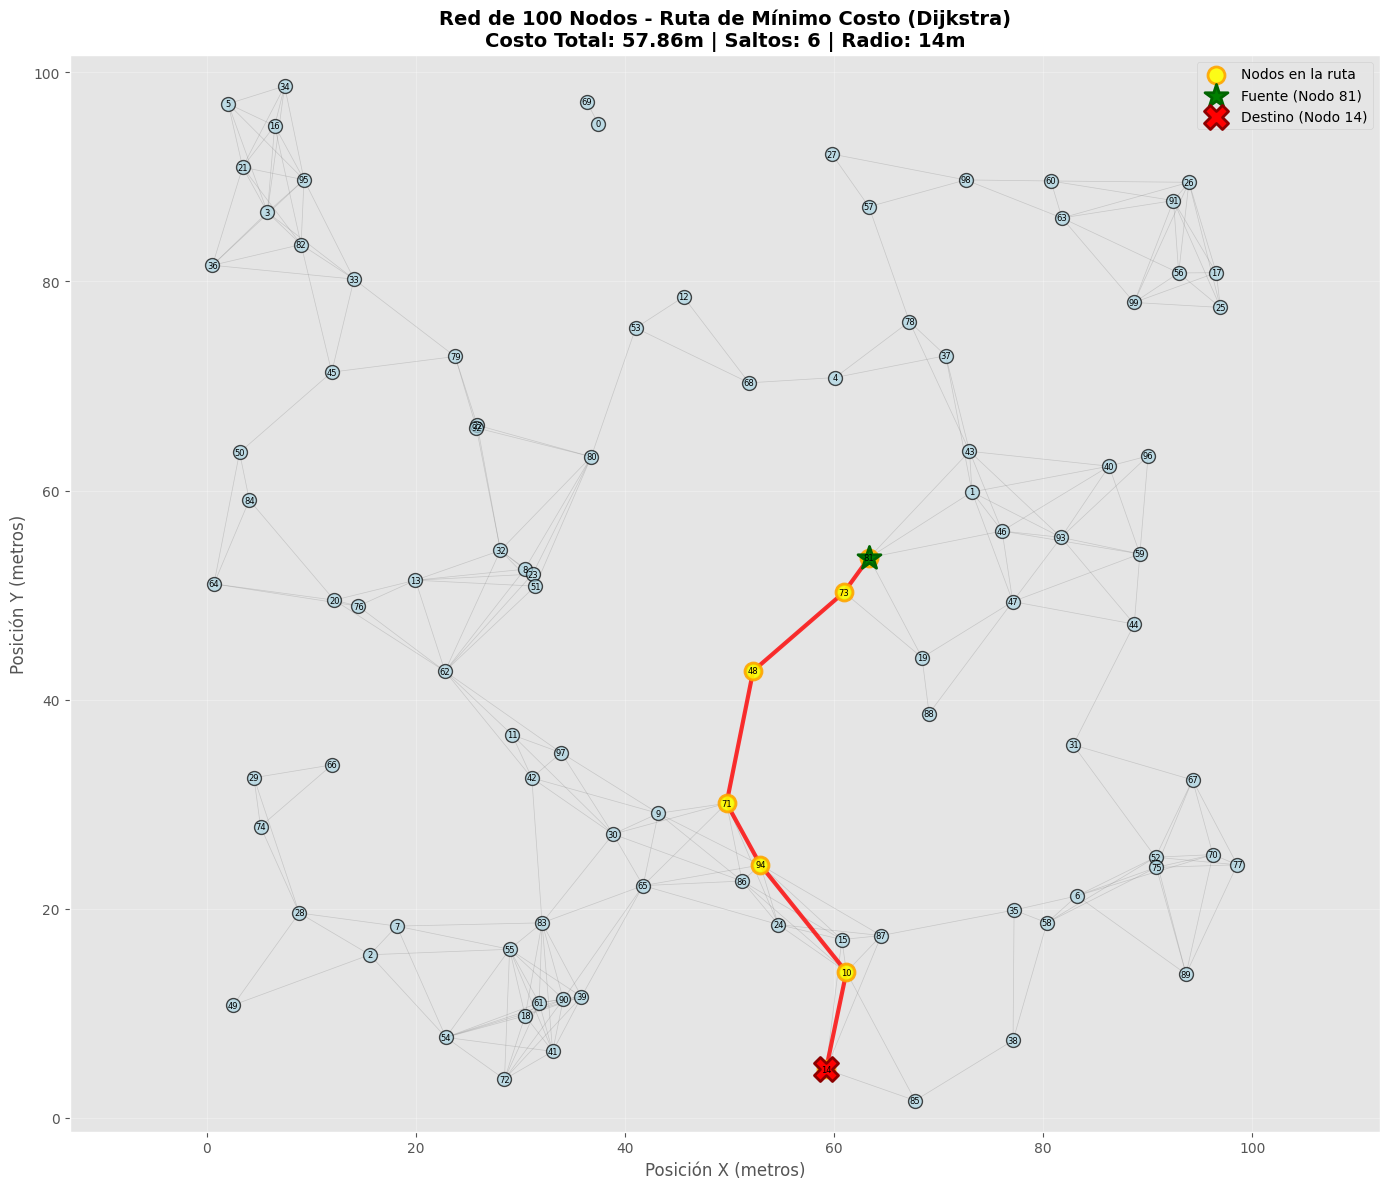

In [11]:
# Crear la figura
plt.figure(figsize=(14, 12))

# Dibujar todos los enlaces de la red en gris claro
for edge in G.edges():
    x_values = [posiciones[edge[0]][0], posiciones[edge[1]][0]]
    y_values = [posiciones[edge[0]][1], posiciones[edge[1]][1]]
    plt.plot(x_values, y_values, 'gray', linewidth=0.5, alpha=0.3, zorder=1)

# Dibujar la ruta de Dijkstra si existe
if ruta_existe and len(ruta) > 0:
    for i in range(len(ruta) - 1):
        nodo_actual = ruta[i]
        nodo_siguiente = ruta[i + 1]
        x_values = [posiciones[nodo_actual][0], posiciones[nodo_siguiente][0]]
        y_values = [posiciones[nodo_actual][1], posiciones[nodo_siguiente][1]]
        plt.plot(x_values, y_values, 'red', linewidth=3, alpha=0.8, zorder=3)

# Dibujar todos los nodos
nodos_x = [posiciones[i][0] for i in range(NUM_NODOS)]
nodos_y = [posiciones[i][1] for i in range(NUM_NODOS)]
plt.scatter(nodos_x, nodos_y, c='lightblue', s=100, edgecolors='black', 
            linewidth=1, alpha=0.7, zorder=2)

# Destacar los nodos de la ruta si existe
if ruta_existe and len(ruta) > 0:
    ruta_x = [posiciones[i][0] for i in ruta]
    ruta_y = [posiciones[i][1] for i in ruta]
    plt.scatter(ruta_x, ruta_y, c='yellow', s=150, edgecolors='orange', 
                linewidth=2, alpha=0.9, zorder=4, label='Nodos en la ruta')

# Destacar el nodo fuente
plt.scatter(posiciones[nodo_fuente][0], posiciones[nodo_fuente][1], 
            c='green', s=300, marker='*', edgecolors='darkgreen', 
            linewidth=2, zorder=5, label=f'Fuente (Nodo {nodo_fuente})')

# Destacar el nodo destino
plt.scatter(posiciones[nodo_destino][0], posiciones[nodo_destino][1], 
            c='red', s=300, marker='X', edgecolors='darkred', 
            linewidth=2, zorder=5, label=f'Destino (Nodo {nodo_destino})')

# Agregar números a los nodos
for i in range(NUM_NODOS):
    plt.text(posiciones[i][0], posiciones[i][1], str(i), 
             fontsize=6, ha='center', va='center', zorder=6)

# Configuración de la gráfica
plt.xlabel('Posición X (metros)', fontsize=12)
plt.ylabel('Posición Y (metros)', fontsize=12)

if ruta_existe:
    titulo = f'Red de {NUM_NODOS} Nodos - Ruta de Mínimo Costo (Dijkstra)\n'
    titulo += f'Costo Total: {costo_total:.2f}m | Saltos: {len(ruta)-1} | Radio: {RADIO_COMUNICACION}m'
else:
    titulo = f'Red de {NUM_NODOS} Nodos - No existe ruta entre fuente y destino\n'
    titulo += f'Radio de Comunicación: {RADIO_COMUNICACION}m'

plt.title(titulo, fontsize=14, fontweight='bold')
plt.xlim(-5, AREA_SIZE + 5)
plt.ylim(-5, AREA_SIZE + 5)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=10)
plt.axis('equal')

# Guardar la figura
plt.savefig('red_dijkstra.png', dpi=300, bbox_inches='tight')
print("\nGráfica guardada como 'red_dijkstra.png'")

plt.tight_layout()
plt.show()

## 8. Estadísticas adicionales de la red

In [12]:
# Análisis de conectividad
print("\n=== ESTADÍSTICAS DE LA RED ===")
print(f"\nConectividad:")
print(f"  - ¿Es conexa? {nx.is_connected(G)}")
print(f"  - Número de componentes: {nx.number_connected_components(G)}")

# Grado promedio
grados = [G.degree(i) for i in range(NUM_NODOS)]
print(f"\nGrados de los nodos:")
print(f"  - Grado promedio: {np.mean(grados):.2f}")
print(f"  - Grado máximo: {np.max(grados)}")
print(f"  - Grado mínimo: {np.min(grados)}")

# Información de la ruta
if ruta_existe:
    print(f"\nInformación de la ruta encontrada:")
    print(f"  - Distancia euclidiana directa: {euclidean(posiciones[nodo_fuente], posiciones[nodo_destino]):.2f}m")
    print(f"  - Distancia por la ruta: {costo_total:.2f}m")
    print(f"  - Factor de desviación: {costo_total / euclidean(posiciones[nodo_fuente], posiciones[nodo_destino]):.2f}x")


=== ESTADÍSTICAS DE LA RED ===

Conectividad:
  - ¿Es conexa? False
  - Número de componentes: 2

Grados de los nodos:
  - Grado promedio: 5.44
  - Grado máximo: 10
  - Grado mínimo: 1

Información de la ruta encontrada:
  - Distancia euclidiana directa: 49.10m
  - Distancia por la ruta: 57.86m
  - Factor de desviación: 1.18x
